In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Updating the path to include more of the folder path to make our later code cleaner
path = r"C:\Users\jphar\Instacart Basket Analysis 09-2025"

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "ords_prods_merge_aggregate.pkl"))

In [5]:
# Just to have a reminder of the shape, field names, and data types of the fields

ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 25 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   hour_ordered_of_day     int64   
 5   days_since_prior_order  float64 
 6   first_time_order        object  
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  price_category          object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_or

# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

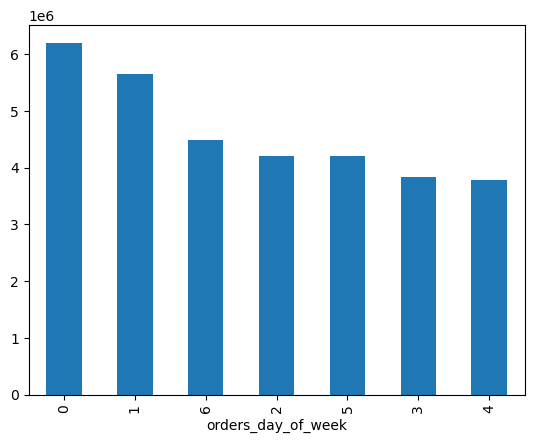

In [6]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

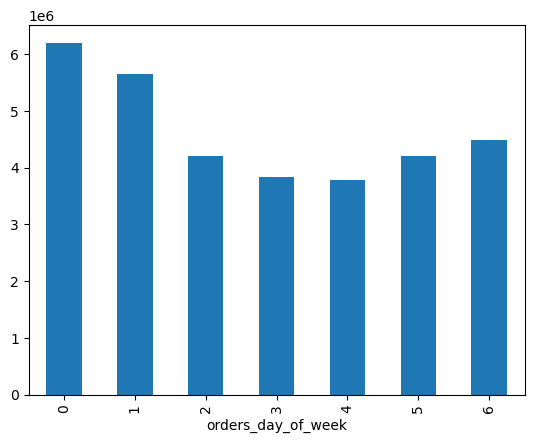

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

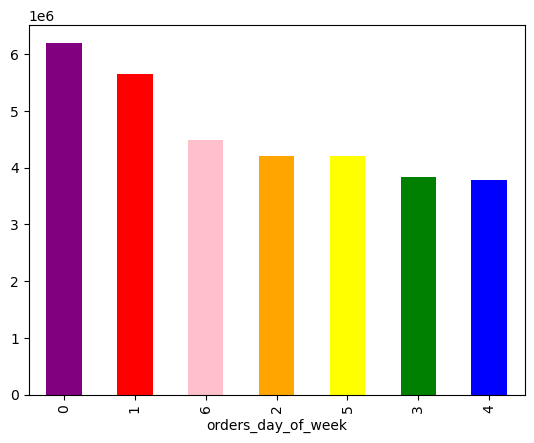

In [10]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink','orange', 'yellow', 'green', 'blue'])

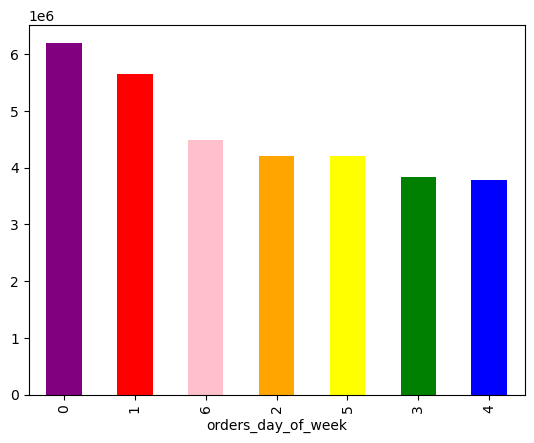

In [11]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink','orange', 'yellow', 'green', 'blue'])

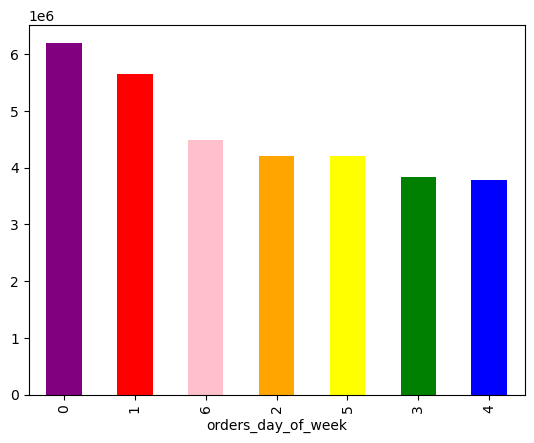

In [12]:
bar.figure

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

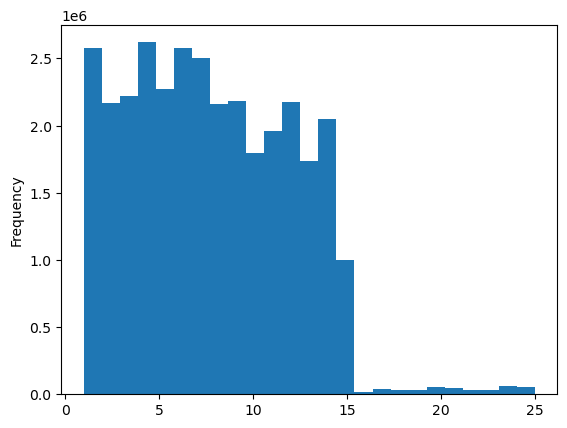

In [13]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [15]:
ords_prods_merge['prices'].mean()

np.float64(7.7909940921733645)

In [16]:
ords_prods_merge['prices'].median()

7.4

In [17]:
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

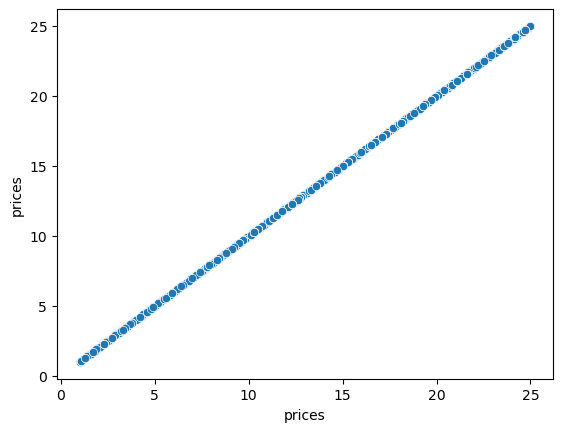

In [18]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

<Axes: ylabel='Frequency'>

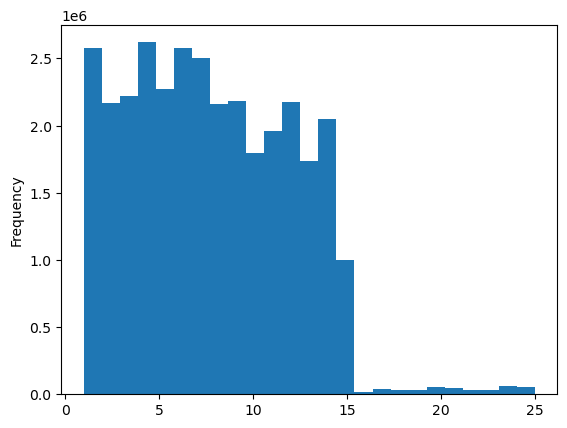

In [19]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

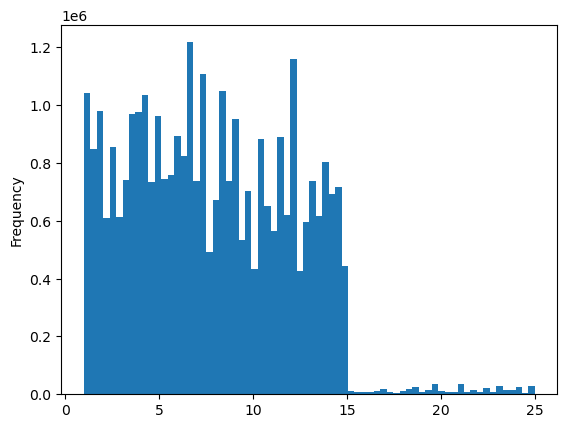

In [20]:
ords_prods_merge['prices'].plot.hist(bins = 70)

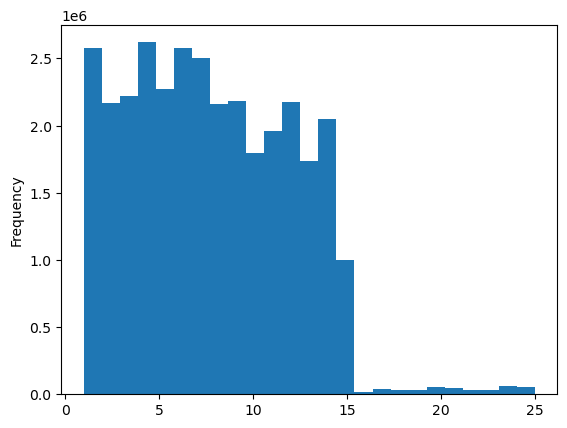

In [21]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [22]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

# Creating Line Charts and Sampling

In [23]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [26]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [27]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [28]:
# Data Integrity check

len(ords_prods_merge)

32404859

In [29]:
len(big) + len(small)

32404859

In [30]:
df_2 = small[['orders_day_of_week', 'prices']]

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')